은행고객이탈 확률예측

In [2]:
# 컬럼 정보
# Customer ID: A unique identifier for each customer
# Surname: The customer's surname or last name
# Credit Score: A numerical value representing the customer's credit score
# Geography: The country where the customer resides (France, Spain or Germany)
# Gender: The customer's gender (Male or Female)
# Age: The customer's age.
# Tenure: The number of years the customer has been with the bank
# Balance: The customer's account balance
# NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
# HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
# IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
# EstimatedSalary: The estimated salary of the customer
# Exited: Whether the customer has churned (1 = yes, 0 = no)

In [46]:
# 1. 데이터 로딩 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_column', 30)
from numpy import nan as NA
churn = pd.read_csv('Churn_Modelling_v1.csv')
churn = churn.drop(['RowNumber'], axis = 1)
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [47]:
# 2. EDA
# 1) 결측치, 이상치 확인
churn.info()           # NA 포함 [Geography, Age, HasCrCard, IsActiveMember]
churn.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   Surname          10002 non-null  object 
 2   CreditScore      10002 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10002 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10002 non-null  int64  
 7   Balance          10002 non-null  float64
 8   NumOfProducts    10002 non-null  int64  
 9   HasCrCard        10001 non-null  float64
 10  IsActiveMember   10001 non-null  float64
 11  EstimatedSalary  10002 non-null  float64
 12  Exited           10002 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 1016.0+ KB


CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >]],
      dtype=object)

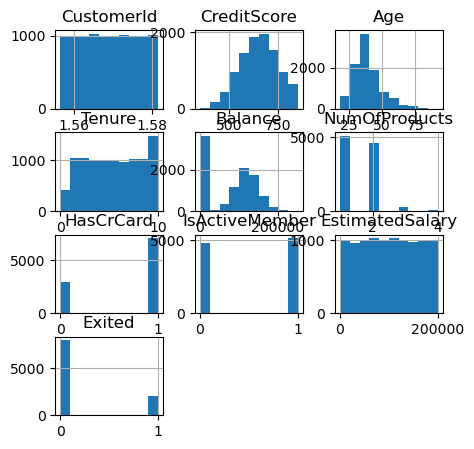

In [48]:
# 수치형 데이터 분포 확인
churn.describe()
churn.hist(figsize = (5,5))

In [49]:
# 범주형 데이터 분포 확인
def f_col_uk(x) : 
    col_list = x.select_dtypes(include=['object']).columns.tolist()
    return x[col_list].apply(lambda x : x.unique())

f_col_uk(churn)

Surname      [Hargrave, Hill, Onio, Boni, Mitchell, Chu, Ba...
Geography                        [France, Spain, nan, Germany]
Gender                                          [Female, Male]
dtype: object

In [50]:
churn.loc[churn['Balance'] == 0, :]

# 잔고가 0인 사람 약 36%  하지만 Exited가 0인 사람이 많다는것은 결측치로 예상됨
# NA로 들어온 [Geography, Age, HasCrCard, IsActiveMember]과함께 결측치 대체 필요

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.0,1,1.0,1.0,101348.88,1
3,15701354,Boni,699,France,Female,39.0,1,0.0,2,0.0,0.0,93826.63,0
6,15592531,Bartlett,822,NaN,Male,50.0,7,0.0,2,1.0,1.0,10062.80,0
11,15737173,Andrews,497,Spain,Male,24.0,3,0.0,2,1.0,0.0,76390.01,0
12,15632264,Kay,476,France,Female,34.0,10,0.0,2,1.0,0.0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,McMillan,841,Spain,Male,28.0,4,0.0,2,1.0,1.0,179436.60,0
9992,15657105,Chukwualuka,726,Spain,Male,36.0,2,0.0,1,1.0,0.0,195192.40,0
9994,15719294,Wood,800,France,Female,29.0,2,0.0,2,0.0,0.0,167773.55,0
9995,15606229,Obijiaku,771,France,Male,39.0,5,0.0,2,1.0,0.0,96270.64,0


In [51]:
churn.loc[churn['Geography'].isna() | churn['Age'].isna() | churn['HasCrCard'].isna() | churn['IsActiveMember'].isna(), :]

# NA가 들어가는 행이 4개 밖에 없고 전부 이탈하지 않았으므로 NA를 포함한 4행 제거

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
6,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
8,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [52]:
churn = churn.dropna(how='any')
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [53]:
# 행 중복 제거(2줄 발견 - 잔고까지 같을 확율 낮음)
churn[churn.duplicated()]
churn = churn.drop_duplicates()
churn

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [55]:
# 라벨인코딩
churn.loc[:,'Gender'] = churn['Gender'].replace({'Male' : 0, 'Female' : 1})
churn.loc[:,'Geography'] = churn['Geography'].replace({'France' : 0, 'Germany' : 1, 'Spain' : 2})

array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >]],
      dtype=object)

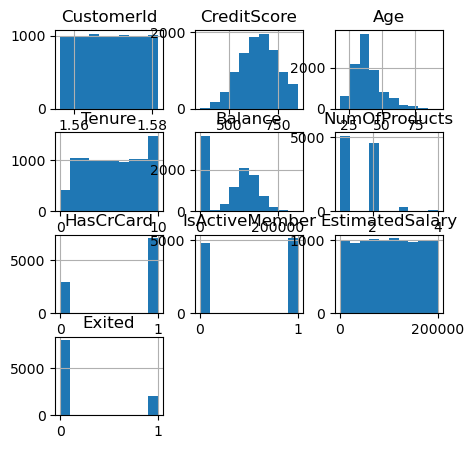

In [56]:
# 라벨 인코딩 후
churn.describe()
churn.hist(figsize = (5,5))

함수

In [57]:
# ttest (연속 범주)
def ttest(x,y):
    from scipy.stats import ttest_ind
    t_statistic, p_value = ttest_ind(x, y)
    return(p_value, p_value < 0.05)        

In [58]:
# 카이제곱 검정 (범주 범주)
def chi2(x,y): 
    from scipy.stats import chi2_contingency
    table = pd.crosstab(x, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(table)
    return (p_value, p_value<0.05)

In [59]:
# 각 변수의 데이터별 총 갯수 출력
def unique_num(x):
    for i in x.columns:
        print(i)
        for j in x[i].unique():
            a1 = 0
            for z in x[i]:
                if j == z:
                    a1 += 1
            print(j ,':', a1)

In [64]:
# =============================================================================
# 단변량 분석(가설 검정) 
# =============================================================================
# 1. X : 연속형, Y : 범주형
# H0 : 변수가 유의하지 않다
from scipy.stats import ttest_ind
def t_pval(X, y) :
    t_statistic, p_value = ttest_ind(X, y)
    return(p_value < 0.05, p_value) 

In [65]:
# 1) CreditScore
t_pval1 = t_pval(churn['CreditScore'], churn['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn['EstimatedSalary'], churn['Exited'])
# 3) Age
t_pval3 = t_pval(churn['Age'], churn['Exited'])   # 범주형으러 만들시 예측룰 하락
# 4) Balance1
bal1 = churn.loc[churn['Balance'] != 0, 'Balance']
bal1_y = churn.loc[churn['Balance'] != 0, 'Exited']
t_pval4 = t_pval(bal1, bal1_y)

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)
print("Balance1: ",t_pval4)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)
Balance1:  (True, 0.0)


In [66]:
# 1) CreditScore
t_pval1 = t_pval(churn['CreditScore'], churn['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn['EstimatedSalary'], churn['Exited'])
# 3) Age
t_pval3 = t_pval(churn['Age'], churn['Exited'])   # 범주형으로 만들시 예측률 하락
# 4) Balance1
bal1 = churn.loc[churn['Balance'] != 0, 'Balance']
bal1_y = churn.loc[churn['Balance'] != 0, 'Exited']
t_pval4 = t_pval(bal1, bal1_y)

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)
print("Balance1: ",t_pval4)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)
Balance1:  (True, 0.0)


In [67]:
# 2. X : 범주형, Y : 범주형
# H0 : 변수간의 연관성이 없다(독립적이다)
from scipy.stats import chi2_contingency

def chi_pval(X, y) :
    contingency_table = pd.crosstab(X, y)
    chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)
    return(p_value < 0.05, p_value) 

In [68]:
# 1) Geography
chi_pval1 = chi_pval(churn['Geography'], churn['Exited'])
# 2) Gender
chi_pval2 = chi_pval(churn['Gender'], churn['Exited'])
# 3) Tenure
chi_pval3 = chi_pval(churn['Tenure'], churn['Exited'])
# 4) NumOfProducts
chi_pval4 = chi_pval(churn['NumOfProducts'], churn['Exited'])
# 5) HasCrCard
chi_pval5 = chi_pval(churn['HasCrCard'], churn['Exited'])
# 6) IsActiveMember
chi_pval6 = chi_pval(churn['IsActiveMember'], churn['Exited'])
# 7) Balance2
churn.loc[:, 'Balance2'] = churn['Balance']
churn.loc[churn['Balance2'] != 0, 'Balance2'] = NA
churn.loc[:, 'Balance2'] = churn['Balance2'].fillna(1)
chi_pval7 = chi_pval(churn['Balance2'], churn['Exited'])

print("Geography:", chi_pval1)
print("Gender:", chi_pval2)
print("Tenure:", chi_pval3)
print("NumOfProducts:", chi_pval4)
print("HasCrCard:", chi_pval5)
print("IsActiveMember:", chi_pval6)
print("Balance2:", chi_pval7)

Geography: (True, 4.817908324955522e-66)
Gender: (True, 2.447348702864124e-26)
Tenure: (False, 0.1837436573107323)
NumOfProducts: (True, 0.0)
HasCrCard: (False, 0.49360421666617627)
IsActiveMember: (True, 1.1830476712052914e-54)
Balance2: (True, 2.5884188913780945e-34)


C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\3133124266.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn.loc[:, 'Balance2'] = churn['Balance']


In [69]:
# =============================================================================
# Balance 0의 의미 연구 - 예비 이탈자?
# =============================================================================
churn_test = churn.loc[churn['Balance'] == 0, :]               # 총 3616개
churn_test = churn_test.drop('CustomerId', axis = 1)
churn_test

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance2
0,Hargrave,619,0,1,42.0,2,0.0,1,1.0,1.0,101348.88,1,0.0
3,Boni,699,0,1,39.0,1,0.0,2,0.0,0.0,93826.63,0,0.0
11,Andrews,497,2,0,24.0,3,0.0,2,1.0,0.0,76390.01,0,0.0
12,Kay,476,0,1,34.0,10,0.0,2,1.0,0.0,26260.98,0,0.0
13,Chin,549,0,1,25.0,5,0.0,2,0.0,0.0,190857.79,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,McMillan,841,2,0,28.0,4,0.0,2,1.0,1.0,179436.60,0,0.0
9992,Chukwualuka,726,2,0,36.0,2,0.0,1,1.0,0.0,195192.40,0,0.0
9994,Wood,800,0,1,29.0,2,0.0,2,0.0,0.0,167773.55,0,0.0
9995,Obijiaku,771,0,0,39.0,5,0.0,2,1.0,0.0,96270.64,0,0.0


In [70]:
# Geography에 대한 랜덤성
chi_pval(churn_test['Geography'], churn_test['Exited'])

# 잔고가 0인 경우에는 고객의 거주 국가와 이탈 여부 간의 연관성이 낮다
# 결측치보다는 다른의미를 시사

(False, 0.8146472025921957)

In [71]:
# Balance가 0인 고객들의 변수들을 시각화해서 변수들의 공통점/차이점 해보자
# 가설검정 및 시각화
# 1) CreditScore
t_pval1 = t_pval(churn_test['CreditScore'], churn_test['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn_test['EstimatedSalary'], churn_test['Exited'])
# 3) Age
t_pval3 = t_pval(churn_test['Age'], churn_test['Exited'])

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)


In [72]:
# 1) Geography
chi_pval1 = chi_pval(churn_test['Geography'], churn_test['Exited'])
# 2) Gender
chi_pval2 = chi_pval(churn_test['Gender'], churn_test['Exited'])
# 3) Tenure
chi_pval3 = chi_pval(churn_test['Tenure'], churn_test['Exited'])
# 4) NumOfProducts
chi_pval4 = chi_pval(churn_test['NumOfProducts'], churn_test['Exited'])
# 5) HasCrCard
chi_pval5 = chi_pval(churn_test['HasCrCard'], churn_test['Exited'])
# 6) IsActiveMember
chi_pval6 = chi_pval(churn_test['IsActiveMember'], churn_test['Exited'])

print("Geography:", chi_pval1)
print("Gender:", chi_pval2)
print("Tenure:", chi_pval3)
print("NumOfProducts:", chi_pval4)
print("HasCrCard:", chi_pval5)
print("IsActiveMember:", chi_pval6)

Geography: (False, 0.8146472025921957)
Gender: (True, 4.1272938912593294e-09)
Tenure: (False, 0.1617315865966249)
NumOfProducts: (True, 1.4161770250352678e-205)
HasCrCard: (False, 0.5374558526681401)
IsActiveMember: (True, 4.2252404027504234e-14)


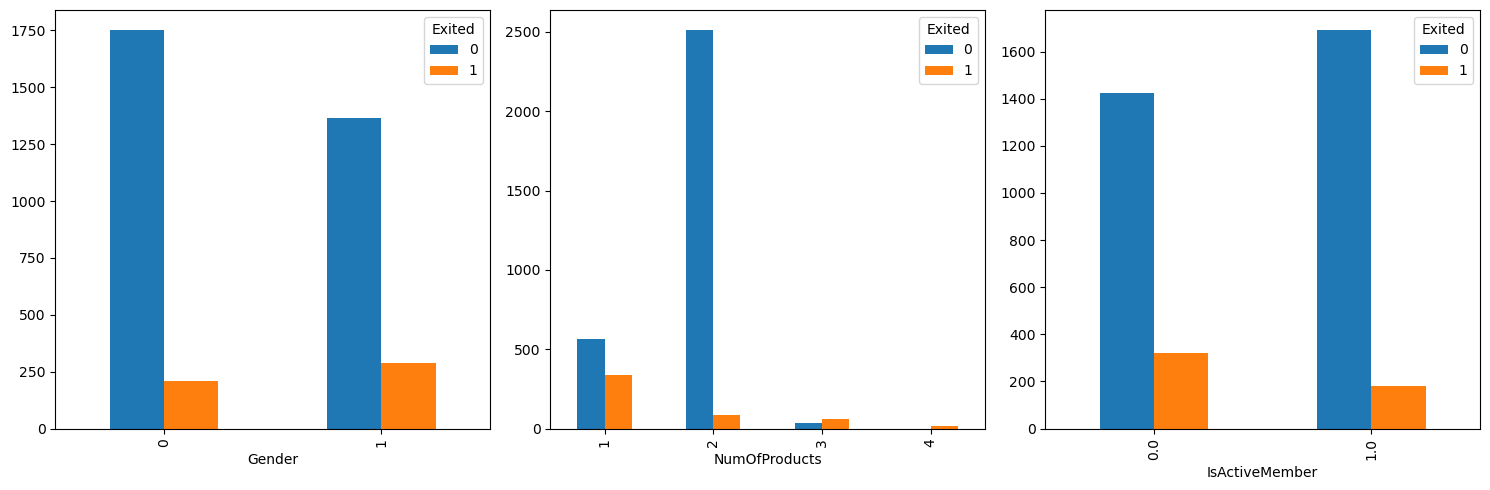

Exited,0,1
NumOfProducts,,
1,567,338
2,2513,86
3,36,62
4,0,14


In [73]:
import matplotlib.pyplot as plt
# 유의미 변수 시각화
g2 = pd.crosstab(churn_test['Gender'], churn_test['Exited'])
p1 = pd.crosstab(churn_test['NumOfProducts'], churn_test['Exited'])
m1 = pd.crosstab(churn_test['IsActiveMember'], churn_test['Exited'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))  

g2.plot(kind='bar', ax=ax[0])
p1.plot(kind='bar', ax=ax[1])
m1.plot(kind='bar', ax=ax[2])

plt.tight_layout()  
plt.show()
p1

In [74]:
# =============================================================================
# Balane != 0
# =============================================================================
churn_test1 = churn.loc[churn['Balance'] != 0, :]               # 총 6382개
churn_test1 = churn_test1.drop('CustomerId', axis = 1)
churn_test1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance2
1,Hill,608,2,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,1.0
2,Onio,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1.0
5,Chu,645,2,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1,1.0
7,Obinna,376,1,1,29.0,4,115046.74,4,1.0,0.0,119346.88,1,1.0
10,Bearce,528,0,0,31.0,6,102016.72,2,0.0,0.0,80181.12,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,Ajuluchukwu,597,0,1,53.0,4,88381.21,1,1.0,0.0,69384.71,1,1.0
9993,Rahman,644,0,0,28.0,7,155060.41,1,1.0,0.0,29179.52,0,1.0
9996,Johnstone,516,0,0,35.0,10,57369.61,1,1.0,1.0,101699.77,0,1.0
9998,Sabbatini,772,1,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1.0


In [75]:
# 가설검정 및 시각화
# 1) CreditScore
t_pval1 = t_pval(churn_test1['CreditScore'], churn_test1['Exited'])
# 2) EstimatedSalary
t_pval2 = t_pval(churn_test1['EstimatedSalary'], churn_test1['Exited'])
# 3) Age
t_pval3 = t_pval(churn_test1['Age'], churn_test1['Exited'])

print("CreditScore: ",t_pval1)
print("EstimatedSalary: ",t_pval2)
print("Age: ",t_pval3)

CreditScore:  (True, 0.0)
EstimatedSalary:  (True, 0.0)
Age:  (True, 0.0)


In [76]:
# 1) Geography
chi_pval1 = chi_pval(churn_test1['Geography'], churn_test1['Exited'])
# 2) Gender
chi_pval2 = chi_pval(churn_test1['Gender'], churn_test1['Exited'])
# 3) Tenure
chi_pval3 = chi_pval(churn_test1['Tenure'], churn_test1['Exited'])
# 4) NumOfProducts
chi_pval4 = chi_pval(churn_test1['NumOfProducts'], churn_test1['Exited'])
# 5) HasCrCard
chi_pval5 = chi_pval(churn_test1['HasCrCard'], churn_test1['Exited'])
# 6) IsActiveMember
chi_pval6 = chi_pval(churn_test1['IsActiveMember'], churn_test1['Exited'])

print("Geography:", chi_pval1)
print("Gender:", chi_pval2)
print("Tenure:", chi_pval3)
print("NumOfProducts:", chi_pval4)
print("HasCrCard:", chi_pval5)
print("IsActiveMember:", chi_pval6)

Geography: (True, 3.650322826318904e-35)
Gender: (True, 2.598465390816895e-19)
Tenure: (False, 0.11538713990745171)
NumOfProducts: (True, 7.680049369760182e-158)
HasCrCard: (False, 0.88853775387753)
IsActiveMember: (True, 1.4211591791329608e-42)


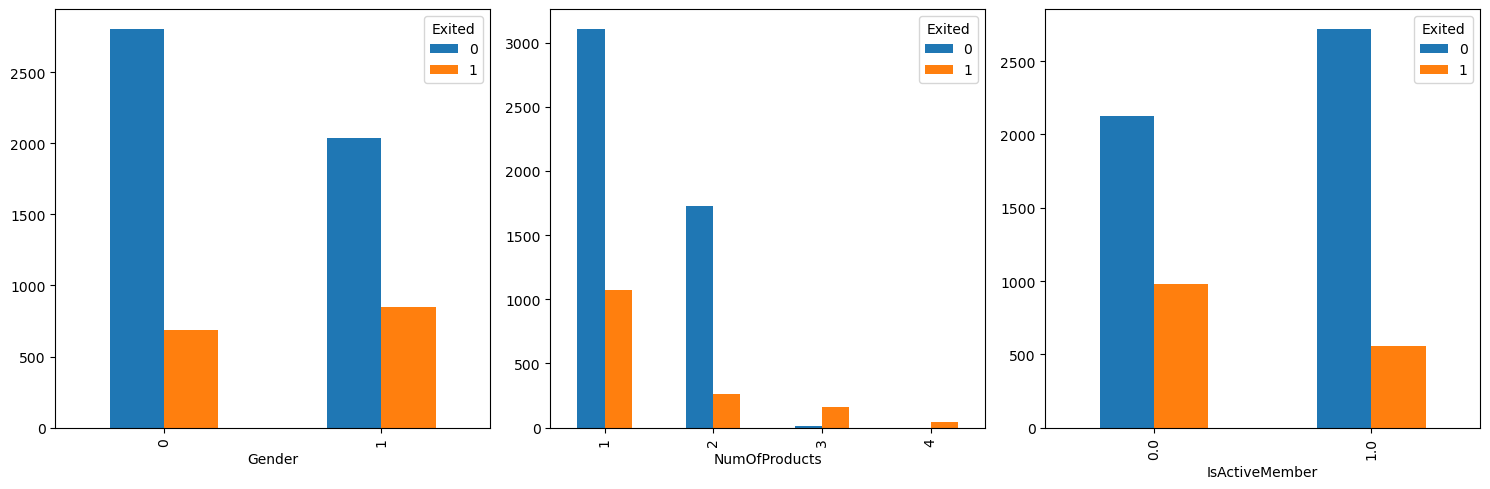

Exited,0,1
NumOfProducts,,
1,3106,1071
2,1727,262
3,10,158
4,0,46


In [77]:
# 유의미 변수 시각화
g21 = pd.crosstab(churn_test1['Gender'], churn_test1['Exited'])
p11 = pd.crosstab(churn_test1['NumOfProducts'], churn_test1['Exited'])
m11 = pd.crosstab(churn_test1['IsActiveMember'], churn_test1['Exited'])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

g21.plot(kind='bar', ax=ax[0])
p11.plot(kind='bar', ax=ax[1])
m11.plot(kind='bar', ax=ax[2])

plt.tight_layout()  
plt.show()
p11

Text(0.5, 1.0, 'Balance != 0')

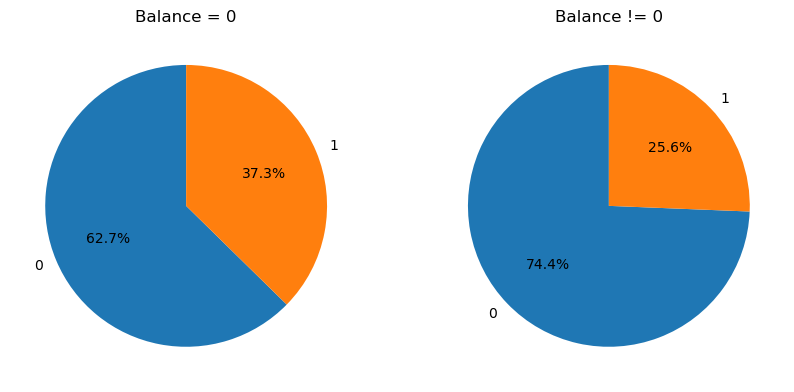

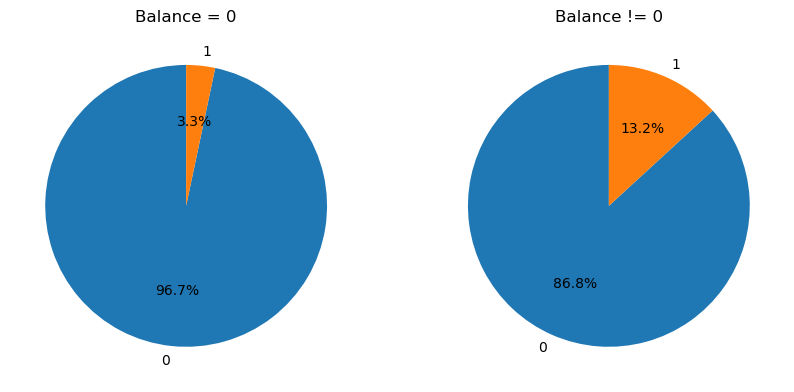

In [78]:
# => Number of Product가 크게 달라짐을 볼수 있음
# 결론이 약간  balance가 0인 사람들이 상품을 1개만 가지고 있을때 상대적으로 이탈확률이 높았다..?
# 확인을 위해 비율 두개만 시각화
# n_product = 1
bal0 = churn_test.loc[churn_test['NumOfProducts']== 1, 'Exited']
bal0 = Series([bal0[bal0 == 0].count(), bal0[bal0 == 1].count()])
ratio0 = bal0/bal0.sum()

bal1 = churn_test1.loc[churn_test1['NumOfProducts']== 1, 'Exited']
bal1 = Series([bal1[bal1 == 0].count(), bal1[bal1 == 1].count()])
ratio1 = bal1/bal1.sum()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(ratio0, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Balance = 0')

axs[1].pie(ratio1, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Balance != 0')

# n_product = 2
bal0 = churn_test.loc[churn_test['NumOfProducts']== 2, 'Exited']
bal0 = Series([bal0[bal0 == 0].count(), bal0[bal0 == 1].count()])
ratio0 = bal0/bal0.sum()

bal1 = churn_test1.loc[churn_test1['NumOfProducts']== 2, 'Exited']
bal1 = Series([bal1[bal1 == 0].count(), bal1[bal1 == 1].count()])
ratio1 = bal1/bal1.sum()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(ratio0, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Balance = 0')

axs[1].pie(ratio1, labels = ['0', '1'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Balance != 0')

Balance = 0인 모든 데이터를 결측치로 보기 어려운 이유  3가지 :
1. Exited(범주) 종속변수와 balance(수치) 독립변수의 로지스틱
=> 회귀결과 & t-test p-value 값 매우유의
2. 랜덤포레스트로  모델구축하면서 피쳐중요도 분석결과, balance 컬럼의 중요도가 꽤나 상위권. 그래서 결측치로 예상되는 컬럼을 제외하고 모델구축할시 조금의 예측률 하락이 있었음 
-> 결측치가 많다 생각한 피쳐가 예측률향상에 유용함 -> 결측치가 아닐수있음 
3. 해당은행의 상품수(여신,대출,등등)을 이용중인 고객에 대하여 
-- 상품을 1개 이용하는 고객 + 2개 이용하는 고객 합쳐서 97.5퍼센트. 
   따라서 1개 or 2개 고객에 대해서, balance=1이면서 상품 1개 이용중인 고객의 이탈율 = 25.63%, 
   balance=1이면서 상품 2개 이용중인 고객의 이탈율 = 13.17% 
   => 상품 1개이용중인고객보다 상품 2개 이용중인고객의 이탈율 12.5%감소

   이제 balance=0이면서 상품 1개 이용중인 고객의 이탈율 = 37.35%
   balance=0이면서 상품 2개 이용중인 고객의 이탈율 = 3.31%
   => 상품 1개이용중인고객보다 상품 2개 이용중인고객의 이탈율 34.04%감소

   상품 1개 이용중인 고객의 이탈율 가장크다 
   감소의 방향성이 이용중인상품이 2개인 고객과 일치하므로 마냥 결측치들의 집합이라고 보긴 어렵다는 결론. 
   하지만 결측치가 아니라 정면반박하기엔 약함.

결론(insight): 특정상품수 이상되면 이탈높아짐
1. 상품 1개만가지고있는경우 이탈율이 크다, 따라서 상품을 빠른시간안에 1개 초과로 가지고있게해야한다. 
2. 이용중인상품 2개이상인 사람들에 대해 이탈율이 여전히 높거나 존재하는것에대해서는, 새로이 이용하고자 하는 상품에 대한 파악시급 -> 파악한 후 그 상품의 매력도 측정, 빠른 개선이 필수(이탈방지). 왜냐하면 최대 관심사 상품의 좋고 나쁘고에 따라이탈여부 발생하므로.  --- 와 같은 인사이트와 대책을 마련해볼수있음 

In [79]:
# 3. 모델링
# 데이터 나누기
churn_x = churn.drop(['Exited','CustomerId','Surname','Balance2'], axis = 1)
churn_y = churn['Exited'] 

from sklearn.model_selection import train_test_split, cross_val_score as cv
train_x, test_x, train_y, test_y = train_test_split(churn_x, churn_y, random_state=0)

# 1차모델) RF
from sklearn.ensemble import RandomForestClassifier as rf_c

m_rf = rf_c()
cv_score_rf = cv(m_rf, churn_x, churn_y, cv = 5)
cv_score_rf.mean()    

0.8605442221110555

In [80]:
m_rf = rf_c()
m_rf.fit(train_x, train_y)
print("Train_score :",m_rf.score(train_x, train_y))
print("Test_score",m_rf.score(test_x, test_y))     
# 과적합 발생

Train_score : 1.0
Test_score 0.858343337334934


In [81]:
from sklearn.metrics import roc_auc_score

rf_probs_tr = m_rf.predict_proba(train_x)[:, 1]
rf_probs_te = m_rf.predict_proba(test_x)[:, 1]

# AUC 계산
rf_auc_tr = roc_auc_score(train_y, rf_probs_tr)   # 1.0
rf_auc_te = roc_auc_score(test_y, rf_probs_te)    # 0.85
print(rf_auc_tr)
print(rf_auc_te)

1.0
0.8599546646064911


In [82]:
# 파생변수

churn['CH'] = churn['CreditScore']*churn['HasCrCard']
churn['AE'] = churn['Age']*churn['EstimatedSalary']
churn['BA'] =churn['Balance']*churn['Age']
churn['B_ES'] = churn['Balance'] / churn['EstimatedSalary']
churn['T_NoP'] = churn['Tenure'] / churn['NumOfProducts']
churn['HM'] = churn['HasCrCard'] * churn['IsActiveMember']

churn

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\2393694959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['CH'] = churn['CreditScore']*churn['HasCrCard']
C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\2393694959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['AE'] = churn['Age']*churn['EstimatedSalary']
C:\Users\WIN-10\AppData\Local\Temp\ipykernel_3320\2393694959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance2,CH,AE,BA,B_ES,T_NoP,HM
0,15634602,Hargrave,619,0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,0.0,619.0,4256652.96,0.00,0.000000,2.000000,1.0
1,15647311,Hill,608,2,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,1.0,0.0,4614245.78,3436122.26,0.744677,1.000000,0.0
2,15619304,Onio,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1.0,502.0,4785125.94,6705753.60,1.401375,2.666667,0.0
3,15701354,Boni,699,0,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,0.0,0.0,3659238.57,0.00,0.000000,0.500000,0.0
5,15574012,Chu,645,2,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1,1.0,645.0,6589295.24,5005254.32,0.759604,4.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,0,39.0,5,0.00,2,1.0,0.0,96270.64,0,0.0,771.0,3754554.96,0.00,0.000000,2.500000,0.0
9996,15569892,Johnstone,516,0,0,35.0,10,57369.61,1,1.0,1.0,101699.77,0,1.0,516.0,3559491.95,2007936.35,0.564108,10.000000,1.0
9997,15584532,Liu,709,0,1,36.0,7,0.00,1,0.0,1.0,42085.58,1,0.0,0.0,1515080.88,0.00,0.000000,7.000000,0.0
9998,15682355,Sabbatini,772,1,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,1.0,772.0,3901317.84,3153163.02,0.808230,1.500000,0.0


In [83]:
# 파생변수 유의성
t_pval1 = t_pval(churn['CH'], churn['Exited'])
t_pval2 = t_pval(churn['AE'], churn['Exited'])
t_pval3 = t_pval(churn['BA'], churn['Exited'])
t_pval4 = t_pval(churn['B_ES'], churn['Exited'])
t_pval5 = t_pval(churn['T_NoP'], churn['Exited'])
t_pval6 = t_pval(churn['HM'], churn['Exited'])

print("CreditScore*HasCrCard: ",t_pval1)
print("Age*EstimatedSalary: ",t_pval2)
print("Balance*Age: ",t_pval3)
print("Balance/EstimatedSalary: ",t_pval4)
print("Tenure/NumOfProducts: ",t_pval5)
print("HasCrCard*IsActiveMember: ",t_pval6)

CreditScore*HasCrCard:  (True, 0.0)
Age*EstimatedSalary:  (True, 0.0)
Balance*Age:  (True, 0.0)
Balance/EstimatedSalary:  (True, 0.000696026685286789)
Tenure/NumOfProducts:  (True, 0.0)
HasCrCard*IsActiveMember:  (True, 6.4242226914233925e-136)


In [84]:
# 2차 모델

# Catboost
import pandas as pd
churn_cat = pd.read_csv('Churn_Modelling_v1.csv')
churn_cat = churn_cat.drop_duplicates()
churn_cat = churn_cat.dropna()
churn_cat['HasCrCard-IsActiveMember'] =churn_cat['HasCrCard'] - churn_cat['IsActiveMember']
churn_cat['CreditScore*HasCrCard']=churn_cat['CreditScore']*churn_cat['HasCrCard']
churn_cat['Age*EstimatedSalary'] = churn_cat['Age']*churn['EstimatedSalary']
churn_cat['Balance*Age']=churn_cat['Balance']*churn_cat['Age']
churn_cat['Balance/EstimatedSalary'] = churn_cat['Balance'] / churn_cat['EstimatedSalary']
churn_cat['Balance-EstimatedSalary'] = abs(churn_cat['Balance'] - churn_cat['EstimatedSalary'])
churn_cat['Tenure-HasCrCard-IsActiveMember'] = (churn_cat['Tenure']-(churn_cat['HasCrCard']-churn_cat['IsActiveMember']))
churn_cat['Tenure/NumOfProducts'] = churn_cat['Tenure'] / churn_cat['NumOfProducts']
churn_cat['Balance/EstimatedSalary*NumOfProducts'] =(churn_cat['Balance'] / churn_cat['EstimatedSalary'])*churn_cat['NumOfProducts']
from numpy import NAN as Na
# vip
churn_cat.loc[churn_cat['Balance/EstimatedSalary*NumOfProducts']>100,:] = NA
churn_cat.dropna(inplace = True)
# 33
churn_cat['Geography'] = churn_cat['Geography'].map({'France':0,'Germany':1, 'Spain':2})
churn_cat['Gender'] = churn_cat['Gender'].map({'Female':0, 'Male':1})
churn_cat = churn_cat.drop_duplicates().drop(['RowNumber','Surname','CustomerId'],axis = 1)
churn_cat_x = churn_cat.drop('Exited', axis = 1)
churn_cat_y = churn_cat['Exited']
train_x, test_x, train_y, test_y = train_test_split(churn_cat_x, churn_cat_y, random_state=0)

In [85]:
%%capture
from catboost import CatBoostClassifier as cbc

m_cb = cbc()
m_cb.fit(train_x, train_y)

In [86]:
print(m_cb.score(train_x, train_y))    # 91.79
print(m_cb.score(test_x, test_y))      # 86.04

0.9179514680252044
0.8604744672295939


In [87]:
%%capture
cv_score_cb = cv(m_cb, churn_cat_x, churn_cat_y, cv = 5)

In [88]:
print(cv_score_cb.mean())      # 86.54

0.8654733698659209


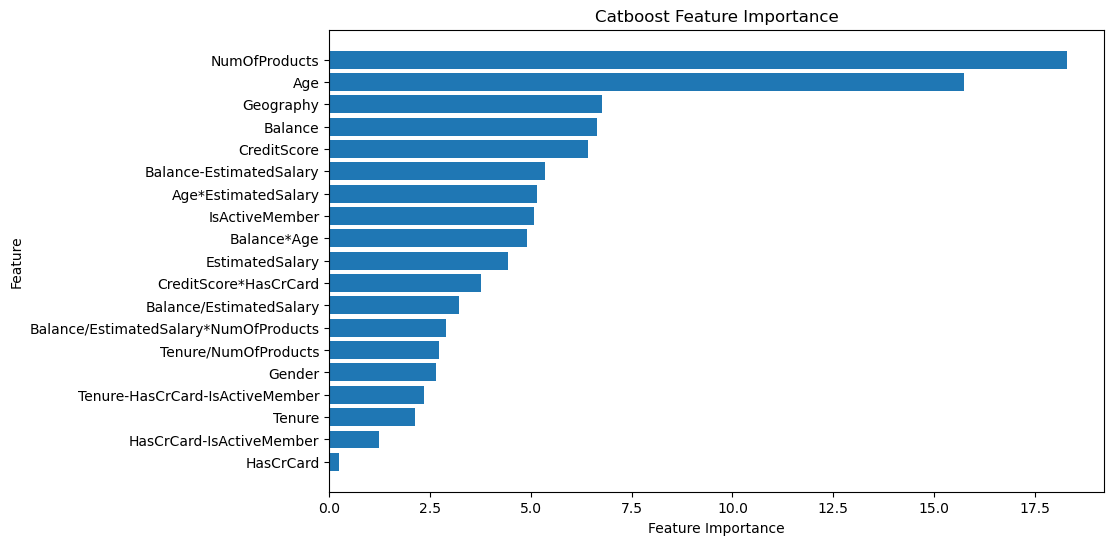

In [89]:
# 시각화

plt.figure(figsize=(10, 6))
sorted_indices = m_cb.feature_importances_.argsort()  # 변수 중요도를 오름차순으로 정렬한 인덱스
plt.barh(range(len(m_cb.feature_importances_)), m_cb.feature_importances_[sorted_indices], align='center')
plt.yticks(range(len(m_cb.feature_importances_)), churn_cat_x.columns[sorted_indices])  # 열 이름을 y축에 표시
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Catboost Feature Importance')
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score

catboost_probs_tr = m_cb.predict_proba(train_x)[:, 1]
catboost_probs_te = m_cb.predict_proba(test_x)[:, 1]

# AUC 계산
catboost_auc_tr = roc_auc_score(train_y, catboost_probs_tr)   # 95.93
catboost_auc_te = roc_auc_score(test_y, catboost_probs_te)    # 86.58
print(catboost_auc_tr)
print(catboost_auc_te)

0.9593262632563943
0.8657895511983424
